In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
# Please ignore the pip's dependency error messages.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-git 0.11.0 requires nbdime<2.0.0,>=1.1.0, but you have nbdime 2.1.0 which is incompatible.


In [3]:
from fastbook import *
from fastai.vision.all import *

In [4]:
path = Path('/kaggle/input/intel-image-classification')
path.ls()

(#3) [Path('/kaggle/input/intel-image-classification/seg_train'),Path('/kaggle/input/intel-image-classification/seg_pred'),Path('/kaggle/input/intel-image-classification/seg_test')]

In [5]:
#directories
#seg_train
#--seg_train
#----buildings
#----forest
#----glacier
#----mountain
#----sea
#----street
#seg_pred
#seg_test
data_block = DataBlock(blocks=(ImageBlock, CategoryBlock),
                      get_items=get_image_files,
                      splitter=GrandparentSplitter('seg_train', 'seg_test'), #split by the folder name. Default is 'train', 'valid'. Fastai will travel to subfolders.
                      get_y=parent_label, # label is the parent directory's name.
                      item_tfms=Resize(460), # Pre-sizing strategy, Fastbook chapter 5. Increasing image size before croping at the next transformation.
                      batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls=data_block.dataloaders(path)

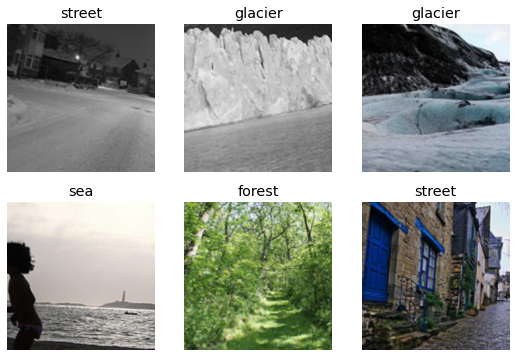

In [6]:
# show sample images and labels
dls.show_batch(nrows=2, ncols=3)

In [7]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.519322,0.299169,0.104667,0.895333,02:06


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.264543,0.195116,0.068333,0.931667,01:46


SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=6.309573450380412e-07)

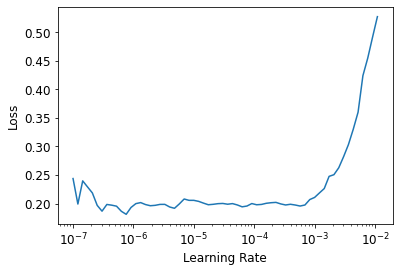

In [8]:
# Find learning rates.
learn.lr_find()

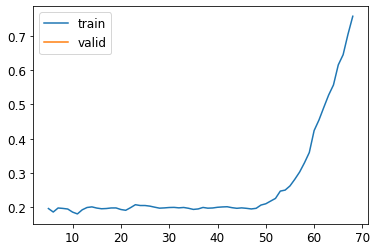

In [9]:
# Plot loss
learn.recorder.plot_loss()

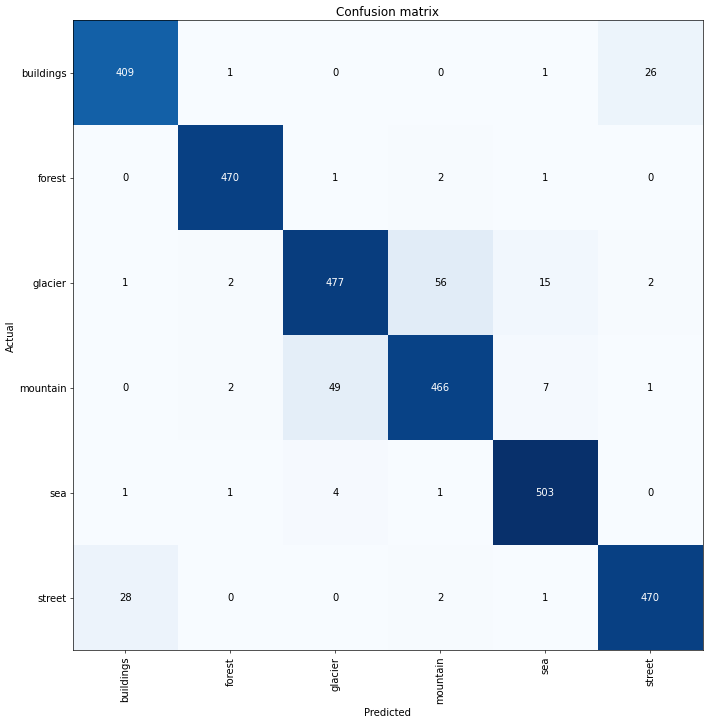

In [11]:
# Plot the confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [12]:
# View CNN model
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      